In [37]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### 1.Initial data inspection and data cleaning:

In [4]:
songs=pd.read_csv('rolling_stones_spotify.csv',sep=',',encoding='ISO-8859-1',header=0)
songs.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donât Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
songs.shape

(1610, 18)

In [6]:
songs.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
songs.duplicated().sum()

0

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


### 2.Refine the data for further processing based on your findings

In [9]:
songs['release_date']=pd.to_datetime(songs['release_date'])

In [10]:
songs.drop(columns=['Unnamed: 0','uri'],inplace=True)
songs.head()

,name,album,release_date,track_number,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Donât Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


### 3.a.Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [11]:
popu_albums=songs.groupby(['album'])['popularity'].mean().sort_values(ascending=False)
popu_albums

album
Sticky Fingers (Remastered)                                                        53.300000
Some Girls                                                                         48.100000
Tattoo You (2009 Re-Mastered)                                                      46.454545
Exile On Main Street (2010 Re-Mastered)                                            44.166667
Beggars Banquet (50th Anniversary Edition)                                         43.700000
Aftermath                                                                          43.090909
Goats Head Soup (Remastered 2009)                                                  40.300000
Out Of Our Heads                                                                   39.583333
Black And Blue (Remastered 2009)                                                   38.500000
Let It Bleed (50th Anniversary Edition / Remastered 2019)                          38.333333
Emotional Rescue (2009 Re-Mastered)                             

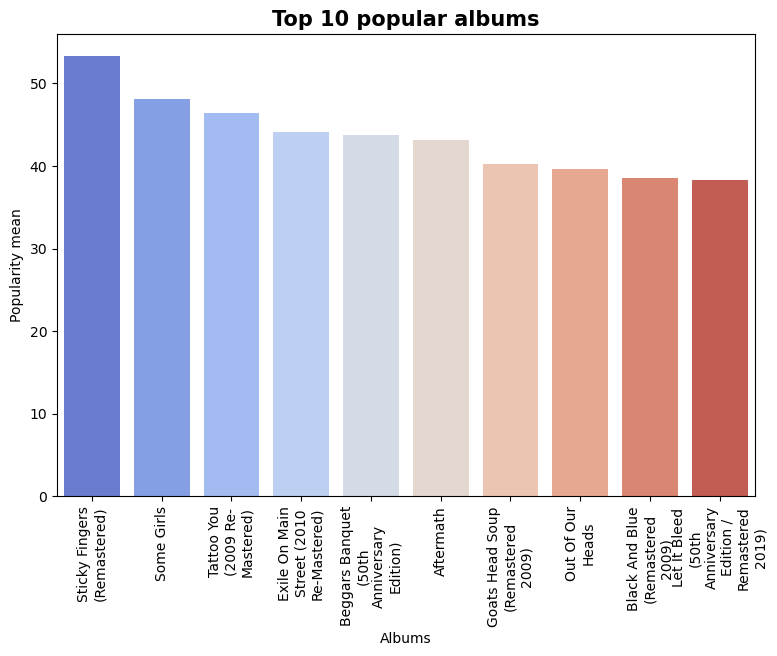

In [12]:
import textwrap
plt.figure(figsize=(9,6))
sns.barplot(x=popu_albums.head(10).index,y=popu_albums.head(10).values,palette='coolwarm')
plt.title('Top 10 popular albums',fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Albums')
plt.ylabel('Popularity mean')
wrapped_labels=[textwrap.fill(labels,width=15) for labels in popu_albums.head(10).index]
plt.xticks(ticks=range(10),labels=wrapped_labels,rotation=90)
plt.show()

# The two albums that should be recommended to anyone based on the number of popular songs in each album are:
* 1.Sticky Fingers (Remastered)
* 2.Some Girls

### 3b.Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

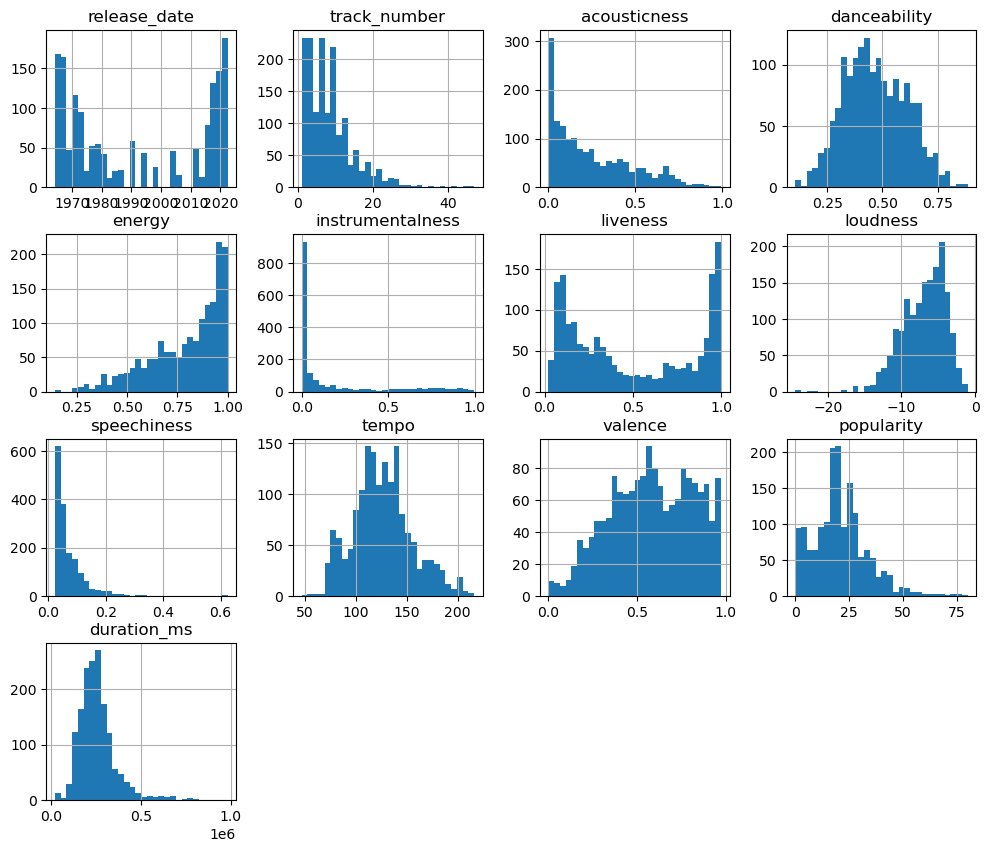

In [13]:
songs.hist(figsize=(12,10),bins=30)
plt.show()

## We can observe that acousticness,instrumentalness and speechiness have vast outliers

### 3c.Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

In [14]:
corr_matrix=songs.corr(numeric_only=True)
corr_matrix

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
track_number,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455
acousticness,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465
valence,-0.104567,-0.138803,0.546210,0.046217,0.103480,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,-0.244833


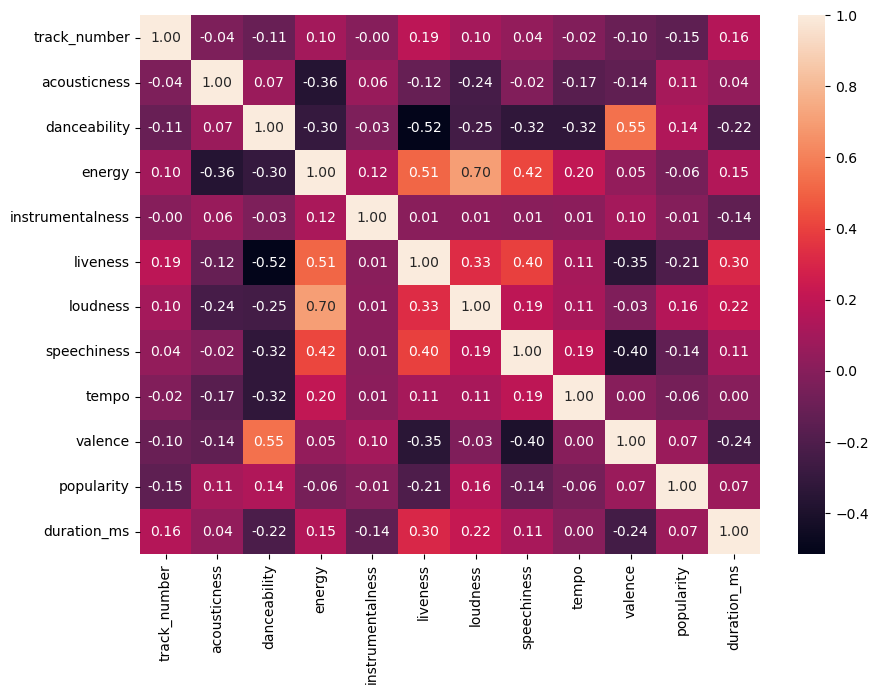

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,fmt='0.2f',annot=True)
plt.show()

## We can observe that popoulairty is not much correlated with any other features.

### 3d.Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [16]:
songs.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


In [17]:
## A prerequisite for dimentionality reduction is to scale the data
from sklearn.preprocessing import StandardScaler
numerical_features=['acousticness','danceability','energy','instrumentalness','liveness',
                     'loudness','speechiness','tempo','valence','popularity','duration_ms']
sc=StandardScaler()
songs_sc=sc.fit_transform(songs[numerical_features])

### Dimentionality reduction is used for transferrring a large dataset into a smaller one
### PCA is one such technique to transform correlated varibles into principal componenets, which helps to capture maximum information.

In [18]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(songs_sc)

PCA(random_state=42)

In [19]:
pca.components_

array([[-0.15820407, -0.41331553,  0.42472986,  0.0052119 ,  0.44467343,
         0.34894833,  0.36247233,  0.20015502, -0.26994835, -0.09728255,
         0.2245785 ],
       [-0.4420471 ,  0.25061377,  0.41477763,  0.15190993, -0.0927555 ,
         0.37938596, -0.15064975,  0.1156913 ,  0.55755713,  0.11685444,
        -0.18310643],
       [ 0.18207623,  0.12244872,  0.04477861, -0.25170245, -0.01104783,
         0.34667181, -0.14317329, -0.3362947 , -0.04754278,  0.61743645,
         0.49911031],
       [ 0.44059371, -0.02487556,  0.10747545,  0.82023854,  0.0328102 ,
         0.08303881,  0.13239534, -0.1634759 , -0.01807773,  0.21550588,
        -0.14805986],
       [ 0.07233341, -0.24986882, -0.14412854, -0.007536  , -0.26905795,
        -0.00788923, -0.0249895 ,  0.75997859, -0.05552798,  0.50175876,
        -0.07753742],
       [ 0.07204032,  0.23450767,  0.12606548, -0.34218254, -0.13965629,
         0.07393884,  0.62751716, -0.15302308, -0.14607263,  0.22713696,
        -0.540

In [20]:
pca.explained_variance_ratio_

array([0.27743591, 0.15085471, 0.11557526, 0.09731454, 0.08776683,
       0.07152961, 0.06358214, 0.05332739, 0.04139033, 0.02587409,
       0.01534919])

## From the above we can observe that:
 - PC1 explains 27% variance in the data
 - PC2 explains 15% variance in the data
 - PC3 explains 11% variance in the data
 - PC4 explains 9% variance in the data and so on

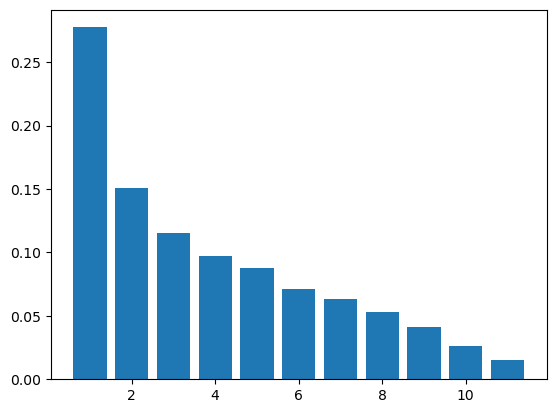

In [21]:
#plot the varinace 
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

## Cumilative sum helps to identify how many compnents are needed to explain the variance in the data)

In [22]:
cum_sum=np.cumsum(pca.explained_variance_ratio_)

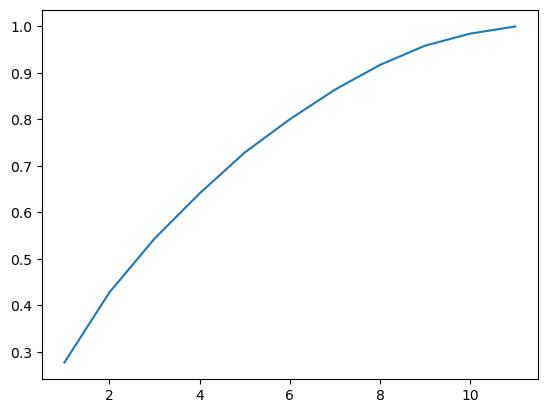

In [23]:
plt.plot(range(1,len(cum_sum)+1),cum_sum)

## We can observe taking 6 varibales can explain about 80% variance in the data

#### PCA with 6 components

In [24]:
pca2=PCA(n_components=6,random_state=42)
df_pca2=pca2.fit_transform(songs_sc)

In [25]:
variance=pca2.explained_variance_ratio_

In [26]:
df=pd.DataFrame(df_pca2,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.836234,-0.646269,-1.812473,2.832309,-0.004671,0.873480
1,1.823819,-0.531577,0.852942,1.040904,0.540421,0.205021
2,1.945802,-0.447652,0.676081,1.578714,0.363403,0.528223
3,2.638875,-1.721583,0.964908,0.777412,0.455003,1.852488
4,2.262631,-1.057508,1.057665,0.393980,0.444432,0.356107


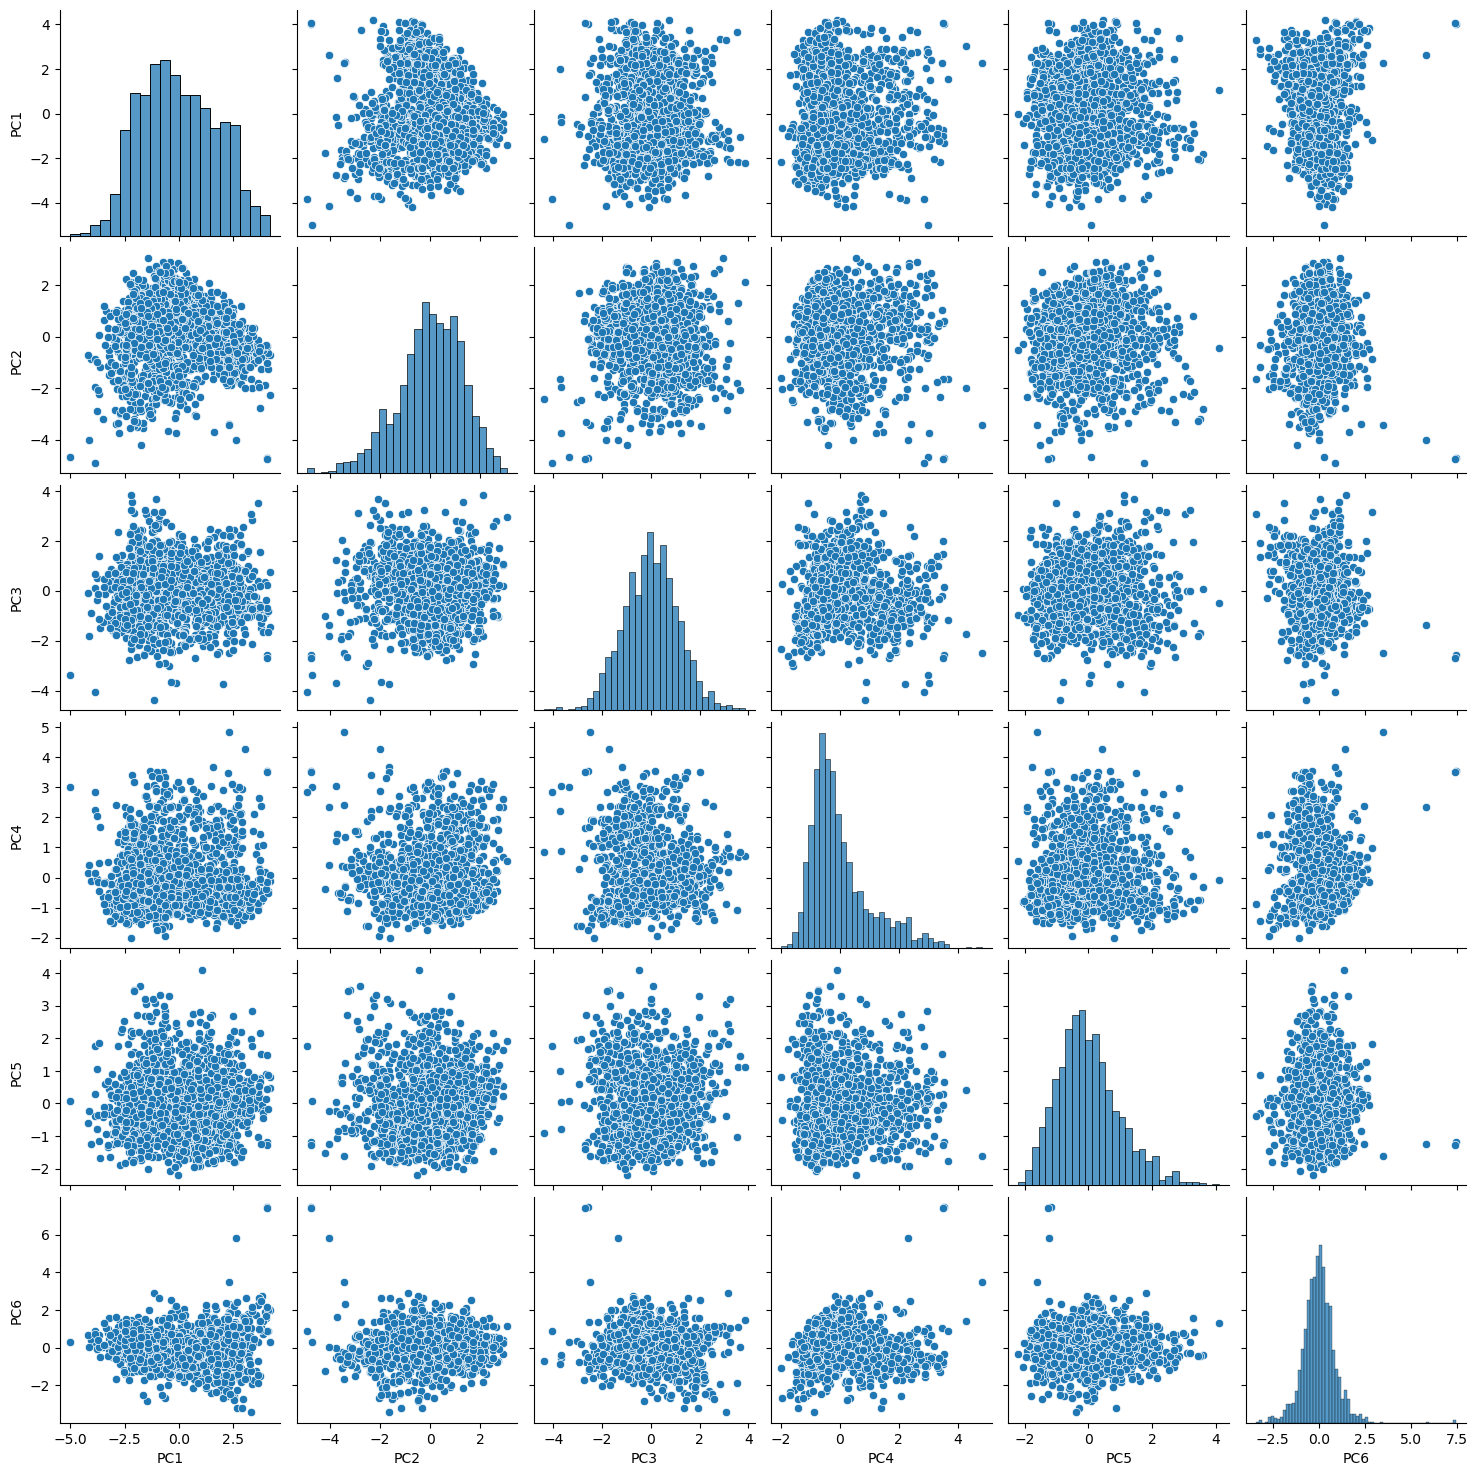

In [27]:
# Visulaise all 6 componentss

sns.pairplot(df)
plt.show()

In [28]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.836234,-0.646269,-1.812473,2.832309,-0.004671,0.873480
1,1.823819,-0.531577,0.852942,1.040904,0.540421,0.205021
2,1.945802,-0.447652,0.676081,1.578714,0.363403,0.528223
3,2.638875,-1.721583,0.964908,0.777412,0.455003,1.852488
4,2.262631,-1.057508,1.057665,0.393980,0.444432,0.356107


### 4.Perform cluster analysis
- a.Identify the right number of clusters
- b.Use appropriate clustering algorithms
- c.Define each cluster based on the features

In [29]:
songs_sc

array([[-0.73935481, -0.0413433 ,  1.11576419, ..., -2.38759041,
         0.98299941, -1.9307186 ],
       [ 0.82051776, -1.00796305,  0.96006155, ..., -1.14267825,
         1.06349527, -0.04213754],
       [ 0.72813952, -0.58462593,  0.98230478, ..., -1.16430633,
         1.06349527,  0.05007868],
       ...,
       [ 0.53018615,  2.265844  , -0.10205293, ...,  1.093665  ,
         0.74151184, -0.75398541],
       [-0.14725428,  1.63083832, -1.36991733, ..., -0.21699652,
         0.50002427, -1.25629462],
       [ 0.58297372,  1.82134003,  0.78767647, ...,  1.67329748,
         1.14399113, -0.63296952]])

## Optimal clusters using sillhoutte analysis
- The value of sillhoutte score lies between -1 and 1

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_in_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_in_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(songs_sc)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(songs_sc,cluster_labels)
    print('For {0} clusters,silhouette score is {1}'.format(num_clusters,silhouette_avg))

For 2 clusters,silhouette score is 0.1867582495998635
For 3 clusters,silhouette score is 0.1566581548000619
For 4 clusters,silhouette score is 0.1181493370787554
For 5 clusters,silhouette score is 0.12008646584443822
For 6 clusters,silhouette score is 0.12429768534211409
For 7 clusters,silhouette score is 0.12915104705725244
For 8 clusters,silhouette score is 0.1336303067176029


In [31]:
# Lets take 4 clusters which give 50% silhoutte score
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(songs_sc)

KMeans(max_iter=50, n_clusters=4)

In [32]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 1])

In [33]:
songs['cluster_id']=kmeans.labels_
cluster_df1=songs[['name','album','cluster_id']]
cluster_df1

,name,album,cluster_id
0,Concert Intro Music - Live,Licked Live In NYC,3
1,Street Fighting Man - Live,Licked Live In NYC,3
2,Start Me Up - Live,Licked Live In NYC,3
3,If You Can't Rock Me - Live,Licked Live In NYC,3
4,Donât Stop - Live,Licked Live In NYC,3
5,Monkey Man - Live,Licked Live In NYC,3
6,Angie - Live,Licked Live In NYC,0
7,Let It Bleed - Live,Licked Live In NYC,3
8,Midnight Rambler - Live,Licked Live In NYC,3
9,Tumbling Dice - Live,Licked Live In NYC,3


In [34]:
cluster_df1.cluster_id.value_counts()

cluster_id
3    542
1    421
2    368
0    279
Name: count, dtype: int64

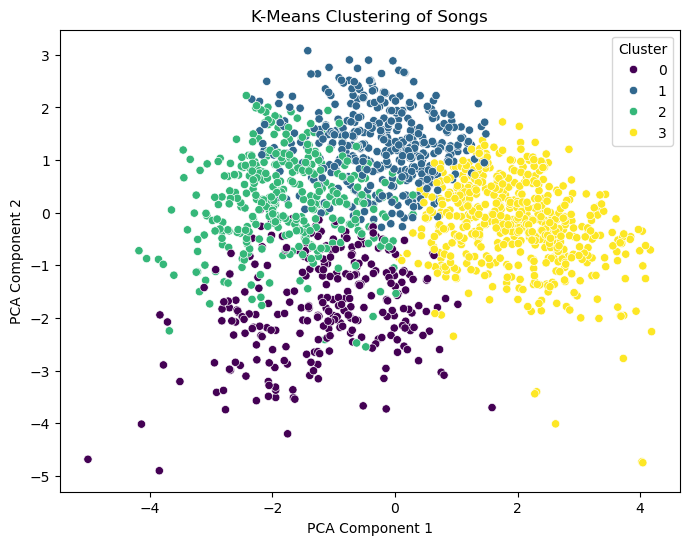

In [35]:
# Plot clusters
plt.figure(figsize=(8, 6))
#Creating scatter plot with top 2 PC's
sns.scatterplot(x=df_pca2[:, 0], y=df_pca2[:, 1], hue=songs['cluster_id'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering of Songs")
plt.legend(title="Cluster")
plt.show()

In [36]:
# Average feature values per cluster
cluster_summary = songs.groupby('cluster_id')[numerical_features].mean()
cluster_summary.T

cluster_id,0,1,2,3
acousticness,0.516562,0.188110,0.213205,0.187251
danceability,0.452025,0.521846,0.588812,0.354924
energy,0.571595,0.879523,0.664043,0.925397
instrumentalness,0.075423,0.221201,0.180633,0.154376
liveness,0.329610,0.372523,0.235165,0.841976
loudness,-9.007996,-4.993751,-9.901168,-5.470609
speechiness,0.046693,0.051971,0.047998,0.109492
tempo,109.832935,123.847230,122.729883,138.458308
valence,0.393235,0.749166,0.749935,0.435791
popularity,25.548387,27.610451,15.111413,16.892989


## Clusters and their features:
- Cluster0- Low acousticness,medium danceability,high energy,medium liveliness and med-high tempo
- Cluster1- Low acousticness,medium danceability,high energy,low liveliness and med-high tempo
- Cluster2- Medium acousticness,medium danceability,medium energy,low liveliness and medium tempo
- Cluster3- Low acousticness,low danceability,very high energy,high liveliness and high tempo

# Steps involved:
1. Inspecting the data
2. Changing the date-object type to datetime type
3. Dropping unnecessary variables
4. Identifying albums with most popular songs
5. Visulaising various features of songs
6. Correlation between popularity and other features
7. Scaling the date using StandardScaler
8. Using dimentionality reduction technique-PCA
9. Using Cumilative sum which helps to identify how many components are needed to explain the variance in the data
10. Performing cluster analysis using silhouette mothod
11. Defining these clusters based on the features